# Distancia de Levenshtein

La distancia de Levenshtein es una métrica entre cadenas definida por Vladimir Levenshtein en 1965. Dada un alfabeto $\Sigma$, la distancia de Levenshtein es una función $lev: \Sigma^* \times \Sigma^* \to \mathbb{R}^+$. Es decir, es uan función que toma dos cadenas y regresa un número positivo, que puede considerarse como una distancia entre las cadenas.

La distancia de Levenshtein se define a partir de <b>ediciones</b>. Una edición puede entenderse como un cambio que se da entre las dos cadenas. En general, se consideran tres tipos de ediciones:

* Inserción: En una cadena $a = c_1 ...c_i ...c_T$ (de longitud $T$) se inserta el símbolo $x$ en la posición $i+1$ cuando este símbolo se agrega el símbolo después de $c_i$; se obtiene la cadena $b = c_1...c_i x...c_T$ (de longitud $T+1$).
* Eliminación: Dada la cadena $a = c_1...c_i...c_T$ (de longitud $T$) se elimna el símbolo $c_i$ obteniendo la cadena $b = c_1...c_{i-1}c_{i+1}...c_T$ (de longitud $T-1$).
* Sustitución: En la cadena $a = c_1...c_i...c_T$ (de longitud $T$) se sustituye el símbolo $c_i$ por $x$ obteniendo la cadena $b = c_1...c_{i-1} x c_{i+1}...c_T$ (de longitud $T$).

Toda cadena $a \in \Sigma^*$ puede transformarse en otra cadena $b \in \Sigma^*$ a partir de aplicar ediciones a la primera cadena hasta obtener la segunda. La distancia de Levenshtein es entonces el número mínimo de ediciones que necesitamos para convertir una cadena en otra. Es decir:

$$lev(a,b) = \min\{|edit| : edit(a) = b\}$$

Donde $edit$ es un conjunto de ediciones que aplicadas a la cadena $a$ la convierten en $b$. Se puede notar que la distancia de Levenshtein es una métrica sobre el espacio de las cadenas; es decir, cumple los siguientes postulados:

1. $lev(a,b) \geq 0$; además, $lev(a,b) = 0$ si y sólo si $a=b$.
2. $lev(a,b) = lev(b,a)$; esto implica que toda edición tiene una inversa que es también una edición.
3. $lev(a,b) \leq lev(a,c) + lev(c,b)$ para algún $c \in \Sigma^*$. Esta propiedad se conoce como desigualdad triangular.

## Algoritmo de Wagner-Fischer

Existen diferentes formas de calcular la distancia de Levenshtein computacionalmente. El algoritmo de Wagner-Fischer es un algoritmo que permite calcular la distancia de Levenshtein a partir de crear una matriz donde los renglones son los símbolos en la cadena de mayor longitud y las columnas los símbolos de la cadena de menor longitud.

La idea del algoritmo de Wagner-Fischer puede resumirse de la siguiente forma:

0. Input: dos cadenas $a$ y $b$, donde $a$ tiene mayor longitud. Sus slongitudes serán $|a| = T_1$ y $|b| = T_2$.
1. Iniciación: Se considera la matriz $M$ de tamaño $(T_1+1) \times (T_2+1)$ tal que $M[i,j]$ es una entrada en el renglón $i$ y la columna $j$
2. Se crea un renglón con los valores de 0 a $T_2$. Estos valores representan las posiciones de los símbolos en $b$ más un valor 0 que se alinea con el inicio de $b$ (no corresponde a ningún símbolo). Véase la tabla abajo. 
3. Se crea una columna con los valores de 0 a $T_1$. Estos valores representan las posiciones de los símbolos en $a$ más un valor 0 que se alinea con el inicio de $a$ (no corresponde a ningún símbolo). Véase la tabla abajo. Con el paso 2 y 3 se ve que el primer renglón y la primera columna se llenan con valores de la longitud de las cadenas.
4. En cada posición $i$ de $a$ y $j$ de $b$, se toman los valores de ediciones observando las entradas alrededor de la posición actual (el renglón y las columnas previas. Estos valores son:
    * Inserción: $M[i-1,j]+1$ (se observa el valor del renglón anterior en la columna actual y se le suma 1 a este valor).
    * Eliminación: $M[i,j-1]+1$ (se observa el valor en el renglón actual y la columna anterior y se le suma 1 a este valor).
    * Substitución: $M[i-1,j-1]+\delta_{c_i \neq c_j}$ (se observa el valor de la columna y el renglón anterior y se le suma 1 si los símbolos son diferentes o 0 si son iguales).
5. Cada entrada del la matriz $M$ se llena con el valor de la edición más pequeña; esto es: $$M[i,j] = \min(M[i-1,j]+1, M[i,j-1]+1, M[i-1,j-1]+\delta_{c_i \neq c_j})$$ para $i,j \geq 1$.

En la siguiente tabla se muestra la matriz creada; denotamos el mínimo de las ediciones como $\min(i,j)$ para abreviar.

| |  | $b_1$ | $b_2$ | ... | $b_{T_2}$ |
| --- | --- | --- | --- | --- | --- |
|  | $0$ | $1$ | $2$ | ... | $T_2$ |
| $a_1$  | $1$ | $\min(1,1)$ | $\min(1,2)$ | ... | $\min(1,T_2)$ |
| $a_2$  | $2$ | $\min(2,1)$ | $\min(2,2)$ | ... | $\min(2,T_2)$ |
| $\vdots$  | $\vdots$ | $\vdots$ | $\vdots$ | ... | $\vdots$ |
| $a_{T_1}$  | $T_1$ | $\min(T_1,1)$ | $\min(T_1,2)$ | ... | $\min(T_1,T_2)$ |

Para terminar, la distancia de levenshtein será el valor $M[T_1,T_2] = \min(M[T_1-1,T_2]+1, M[T_1,T_2-1]+1, M[T_1-1,T_2-1]+\delta_{c_{T_1} \neq c_{T_2}})$ 

### Ejemplo:

Considérense las palabras $sol$ y $sal$. Tenemos primero que establecer la columna 0 con los valores 0 1 2 3 y el renglón 0 con los valores 0 1 2 3 correspondientes a las longitudes de las palabras (más un inicial 0):

| | |  s | o | l |
| --- | --- | --- | --- | --- |
|  | 0 | 1 | 2 | 3 |
| s  | 1 |  |  | |
| a  | 2 |  |  |  |  |
| l  | 3 |  |  |  |

Cuando $i = 1 = j$ tenemos: 

1. Inserción $M[1-1, 1] = M[0,1] = 1$ (el valor del renglón 0 en la columna 1. Sumando 1, tenemos que la inserción es 2.
2. Eliminación: $M[1, 1-1] = M[1,0] = 1$ (el valor del renglón 0 en la columna 1. Sumando 1, tenemos que la inserción es 2.
3. Substitución: $M[1-1,1-1] = M[0,0] = 0$ (el valor del renglón 0 en la columna 0) y ya que $s = s$ (los símbolos son iguales en esta posición, tenemos que el valor final es 0.
     
Una vez calculado los valores de las ediciones elejimos el mínimo, esto es $\min(2,2,0) = 0$. Por tanto el valor de la matriz en la posición $M[1,1] = 0$

Podemos hacer el mismo procedimiento recorriendo el renglón 1 en las diferentes columnas. Veremos que este primer renglón tiene los valores 1, 2 y 3. Con estos nuevos valores podemos pasar al siguiente renglón.

Cuando $i=2$ y $j1$, tenemos las siguientes ediciones:
     
1. Inserción $M[2-1, 1] + 1 = M[1,1] + 1 = 0 + 1 = 1$
2. Eliminación: $M[2, 1-1] + 1 = M[2,0] + 1 = 2+1 = 3$ 
3. Substitución: $M[2-1,1-1] + \delta_{a\neq o} = M[1,0] + \delta_{a\neq s} = 1 + 1 = 2$  ya que $a \neq s$.

Tomando el mínimo, tenemos que $M[2,1] = 1$.

La siguiente tabla muestra los valores que se obtienen al correr el algoritmo.

| | |  s | o | l |
| --- | --- | --- | --- | --- |
|  | 0 | 1 | 2 | 3 |
| s  | 1 | 0 | 1 | 2 |
| a  | 2 | 1 | 1 | 2 |
| l  | 3 | 2 | 2 | 1 |

El valor que nos interesa es $M[3,3]$ que es la distancia de Levenshtein, podemos ver que este valor se calcula por las siguientes ediciones: 1) Inserción: $M[2,3]+1 = 3$; 2) Eliminación: $M[3,2]+1 = 3$; y 3) Substitución: $M[2,2] + 0 = 1$ (pues los símbolos son ambos l). Por tanto, el valor de esta entrada $\min(3,3,1) = 1$. Que es la distancia de Levenshtein entre estas dos cadenas. Es decir:

$$lev(sal, sol) = 1$$

Esto implica que el número de ediciones mínimo para pasar de la palabra "sal" a "sol" es 1. De hecho vemos que esta edición es la substitución de "a" por "o".

## Implementación

Una vez entendido el algoritmo de Wagner-Fisher para calcular la distancia de Levenshtein, podemos implementarla en Python. La siguiente función define la distancia de Levenshtein.

In [1]:
def lev(s1, s2):
    #Se asume que el primer argumento
    #siempre tiene la mayor longitud
    #Si no es así, se invierten los argumentos
    if len(s1) < len(s2):
        return lev(s2, s1)
 
    #Si s2 es la cadena epsilon,
    #se toma la distancia como la longitud de s1
    if len(s2) == 0:
        return len(s1)
 
    #Posiciones de s2 de 0 a |s2|+1
    previous_row = range(len(s2) + 1)
    #Revisa cada símbolo (y su posición) en s1
    for i, c1 in enumerate(s1):
        #Guarda la posición actual
        current_row = [i + 1]
        #Revisa cada símbolo (y su posición) en s2
        for j, c2 in enumerate(s2):
            #REVISA TIPOS DE EDICIONES
            #Observa si hay eliminación
            insertions = previous_row[j + 1] + 1
            #Observa si hay una eliminación
            deletions = current_row[j] + 1
            #Si c1 es diferente de c2, es porque hay substitución
            substitutions = previous_row[j] + (c1 != c2)
            
            #Determina el edit más pequeño
            minimum_edit = min(insertions, deletions, substitutions)
            #Agrega este edit a current_row ()
            current_row.append(minimum_edit)
            
        #En la actual posición en s1, se iguala
        #previous_row con current_row
        previous_row = current_row
 
    #Regresa el último elemento de el último renglón
    #Este es el número más pequeño de ediciones
    return previous_row[-1]

Podemos entonces calcular la distancia entre "sal" y "sol".

In [2]:
lev('sol','sal')

1

### Espacio de cadenas

Cuando a un conjunto se le dota de una métrica se puede construir un espacio. Podemos hacer eso con un conjunto de cadenas y la distancia de Levenshtein. Para esto, usaremos el método de Escalamiento Multidimensional, que proyecto los elementos de un conjunto a un espacio vectoria con base en las distancias que existen entre los elementos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

#Función para plotear en dos dimensiones con etiquetas
def plot_words(X,ids):
    r=0
    plt.scatter(X[:,0],X[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, X[:,0], X[:,1]):
        plt.annotate(label, xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1

En primer lugar, calculamos una matriz de distancias, que nos da el valor de la distancia entre cada dos elementos del conjunto, en este caso cadenas de palabras. Como se observa, la matriz es simétrica, pues la distancia de Levenshtein, en tanto métrica, es simétrica.

In [4]:
words = ['sal', 'sol', 'hola', 'bola', 'de', 'amor', 'gatos', 'niñas', 'ratos']

#Calculo de la distancia de métricas entre palabras
metric = np.zeros((len(words), len(words)))
for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        dist = lev(word1,word2)
        metric[i,j] = dist
        
        
pd.DataFrame(data=metric, index=words, columns=words)

,sal,sol,hola,bola,de,amor,gatos,niñas,ratos
sal,0.0,1.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
sol,1.0,0.0,2.0,2.0,3.0,3.0,4.0,5.0,4.0
hola,3.0,2.0,0.0,1.0,4.0,4.0,5.0,4.0,5.0
bola,3.0,2.0,1.0,0.0,4.0,4.0,5.0,4.0,5.0
de,3.0,3.0,4.0,4.0,0.0,4.0,5.0,5.0,5.0
amor,4.0,3.0,4.0,4.0,4.0,0.0,3.0,5.0,3.0
gatos,4.0,4.0,5.0,5.0,5.0,3.0,0.0,4.0,1.0
niñas,4.0,5.0,4.0,4.0,5.0,5.0,4.0,0.0,4.0
ratos,4.0,4.0,5.0,5.0,5.0,3.0,1.0,4.0,0.0


Con esta matriz de distancias, podemos aplicar el método de Escalamiento Multidimensional y proyectar las palabras en un espacio de dos dimensiones. Como se observa, las palabras que tienen una similitud en sus símbolos están cercanas, pues es esta propiedad la que resalta la distancia de Levenshtein.

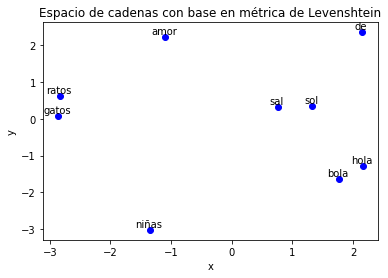

In [5]:
mds_model = MDS(n_components=2, dissimilarity='precomputed')
X_red = mds_model.fit_transform(metric)

plot_words(X_red, words)
plt.title('Espacio de cadenas con base en métrica de Levenshtein')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
#pd.DataFrame(data=X_red, index=words, columns=['x','y'])

Puede consultarse la bibliografía:

* Levenshtein, V. I. (1966, February). "Binary codes capable of correcting deletions, insertions, and reversals". In Soviet physics doklady.
* Navarro, Gonzalo (2001). "A guided tour to approximate string matching". ACM Computing Surveys. 33 (1): 31–88.
* Wagner–Fischer algorithm. Wikipedia.